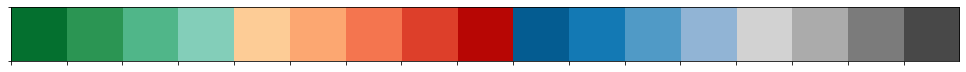

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
sns.set_palette(palette1)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 40926  100 40926    0     0  40926      0  0:00:01 --:--:--  0:00:01 90344


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
5,2020-02-24 18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148
6,2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,58
7,2020-02-24 18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124
8,2020-02-24 18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,1
9,2020-02-24 18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    
conf.set_index('data', inplace=True)
deaths.set_index('data', inplace=True)
conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
data,,,,,,,,,,,,,,,,,,,,,
2020-03-12 17:00:00,84,8,33,179,1947,167,200,274,8725,592,...,104,107,580,104,39,115,364,64,27,1384
2020-03-13 17:00:00,89,10,38,220,2263,257,277,345,9820,725,...,125,163,840,129,43,130,470,76,28,1595
2020-03-14 17:00:00,112,10,60,272,2644,301,357,463,11685,899,...,173,206,873,166,47,156,630,107,42,1937
2020-03-15 17:00:00,137,11,68,333,3093,347,436,559,13272,1133,...,204,378,1111,230,77,188,781,143,57,2172
2020-03-16 17:00:00,176,12,89,400,3522,386,523,667,14649,1242,...,241,378,1516,230,107,213,866,164,105,2473


In [5]:
# select only countries with > 200 positive COVID-19 cases
selected_columns = conf.max()>200
conf = conf.loc[:,selected_columns]

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

In [6]:
# latest number of cases by country
print(conf.max())

Campania                   400
Emilia Romagna            3522
Friuli Venezia Giulia      386
Lazio                      523
Liguria                    667
Lombardia                14649
Marche                    1242
P.A. Bolzano               241
P.A. Trento                378
Piemonte                  1516
Puglia                     230
Sicilia                    213
Toscana                    866
Veneto                    2473
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

Text(0, 0.5, 'Total number of positive COVID-19 cases (linear scale)')

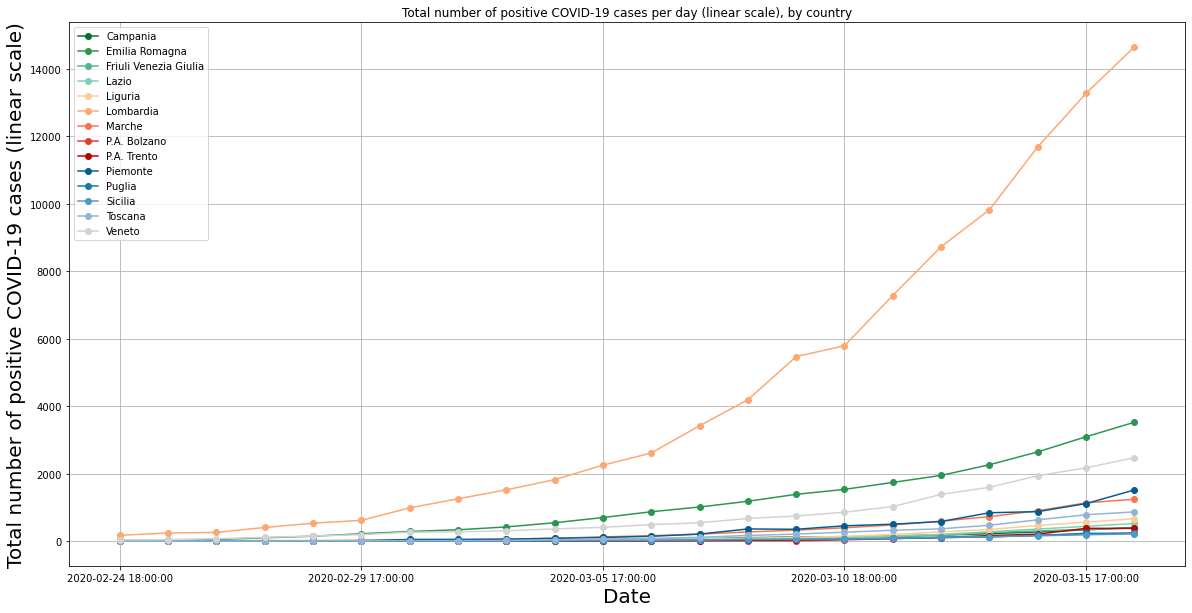

In [8]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (linear scale)", fontsize=20)

Text(0, 0.5, 'Total number of positive COVID-19 cases (log scale)')

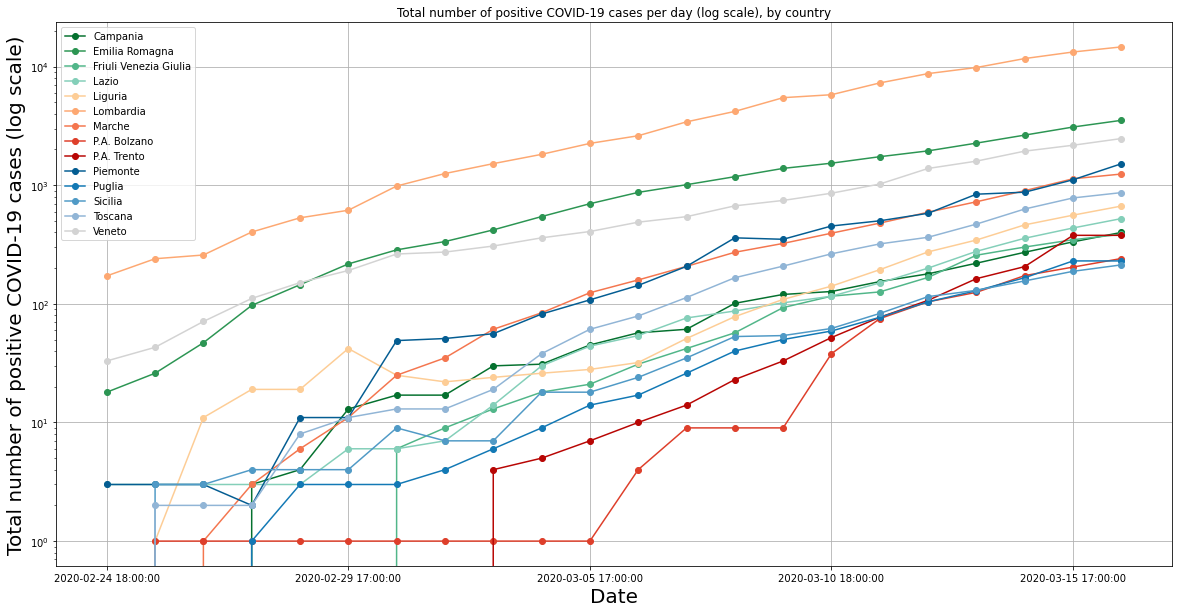

In [9]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (log scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (log scale)", fontsize=20)

Text(0, 0.5, 'Total number of COVID-19 death cases (linear scale)')

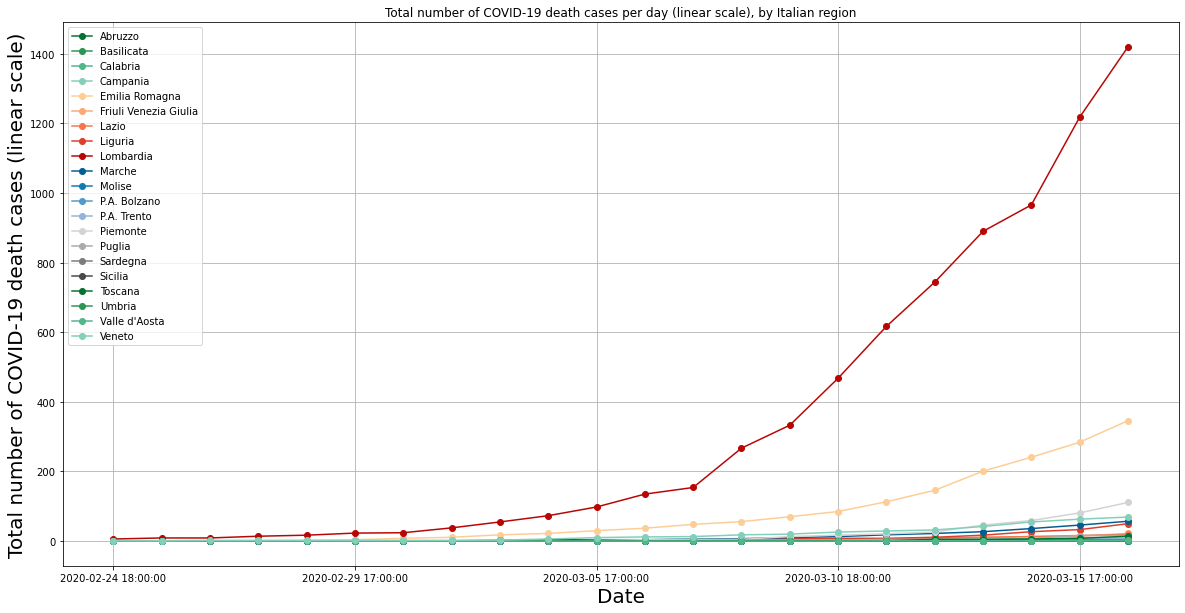

In [10]:
#show total number of positive cases
plot1 = deaths[deaths.columns.values].plot(grid=True, marker='o',
         title='Total number of COVID-19 death cases per day (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of COVID-19 death cases (linear scale)", fontsize=20)

(0.0, 0.1)

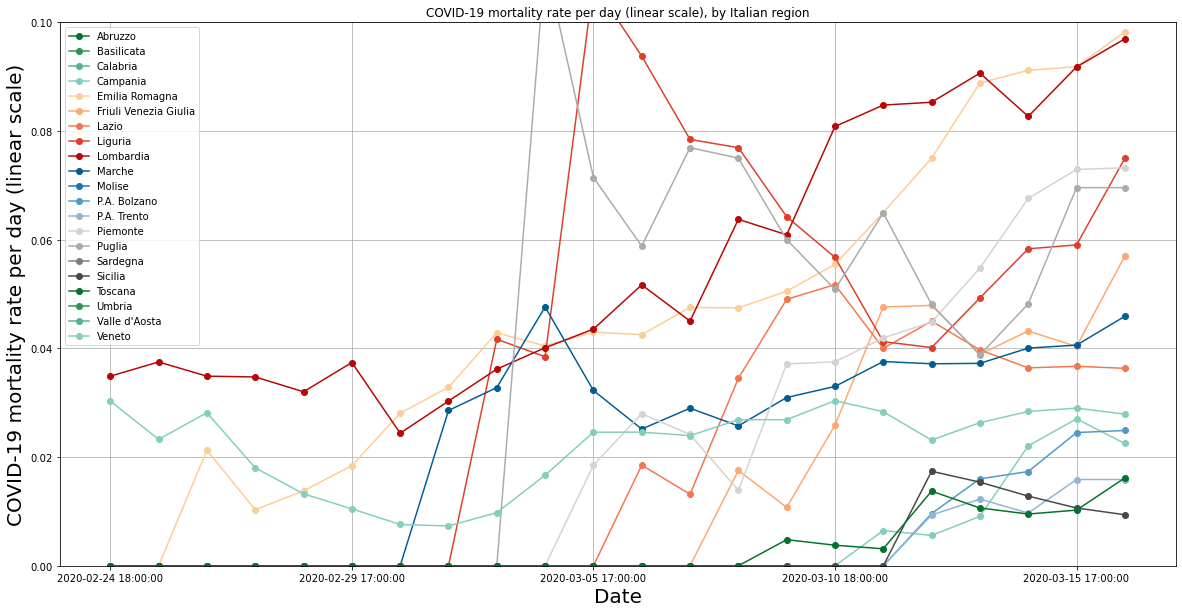

In [11]:
mortality = deaths.divide(conf.replace(0, 1))

#show total number of positive cases
plot1 = mortality[mortality.columns.values].plot(grid=True, marker='o',
         title='COVID-19 mortality rate per day (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 mortality rate per day (linear scale)", fontsize=20)
plot1.set_ylim(0,0.1)

In [12]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [13]:
# rename population country names that don't match COVID-19 data
population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')

In [14]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population.head()

Territory,Piemonte,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Marche,Lazio,Campania,Puglia,Sicilia
0,4.39384e+06,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,1.59126e+06,5.67948e+06,5.84041e+06,4.09045e+06,5.1511e+06


In [15]:
# concatenate dataset
conf = pd.concat([population,conf])
conf.head()

,Piemonte,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Marche,Lazio,Campania,Puglia,Sicilia,P.A. Bolzano,P.A. Trento
0,4.39384e+06,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,1.59126e+06,5.67948e+06,5.84041e+06,4.09045e+06,5.1511e+06,NaN,NaN
2020-02-24 18:00:00,3,0,172,33,0,18,0,0,3,0,0,0,0.0,0.0
2020-02-25 18:00:00,3,1,240,43,0,26,2,0,3,0,0,3,1.0,0.0
2020-02-26 18:00:00,3,11,258,71,0,47,2,1,3,0,0,3,1.0,0.0
2020-02-27 18:00:00,2,19,403,111,0,97,2,3,3,3,1,4,1.0,0.0


In [16]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf = conf.loc[:].div(conf.iloc[0][:]/10/1e3)

In [17]:
# remove population row
conf = conf.iloc[1:]
conf.dropna(axis=1, inplace=True)
conf.tail()

,Piemonte,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Marche,Lazio,Campania,Puglia,Sicilia
2020-03-12 17:00:00,1.32003,1.70639,8.89637,2.79317,1.35001,4.3762,0.968065,3.72031,0.352145,0.306485,0.254251,0.223253
2020-03-13 17:00:00,1.91177,2.14856,10.0129,3.219,2.07757,5.08646,1.24997,4.55612,0.48772,0.376686,0.315369,0.252373
2020-03-14 17:00:00,1.98687,2.88343,11.9145,3.90922,2.43326,5.94282,1.6755,5.64959,0.628578,0.465721,0.405823,0.302848
2020-03-15 17:00:00,2.52854,3.48129,13.5327,4.38349,2.80512,6.95202,2.07709,7.12012,0.767675,0.570166,0.562285,0.364971
2020-03-16 17:00:00,3.45029,4.15388,14.9367,4.99097,3.12039,7.91627,2.30314,7.80511,0.920858,0.684884,0.562285,0.413504


Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (linear scale)")

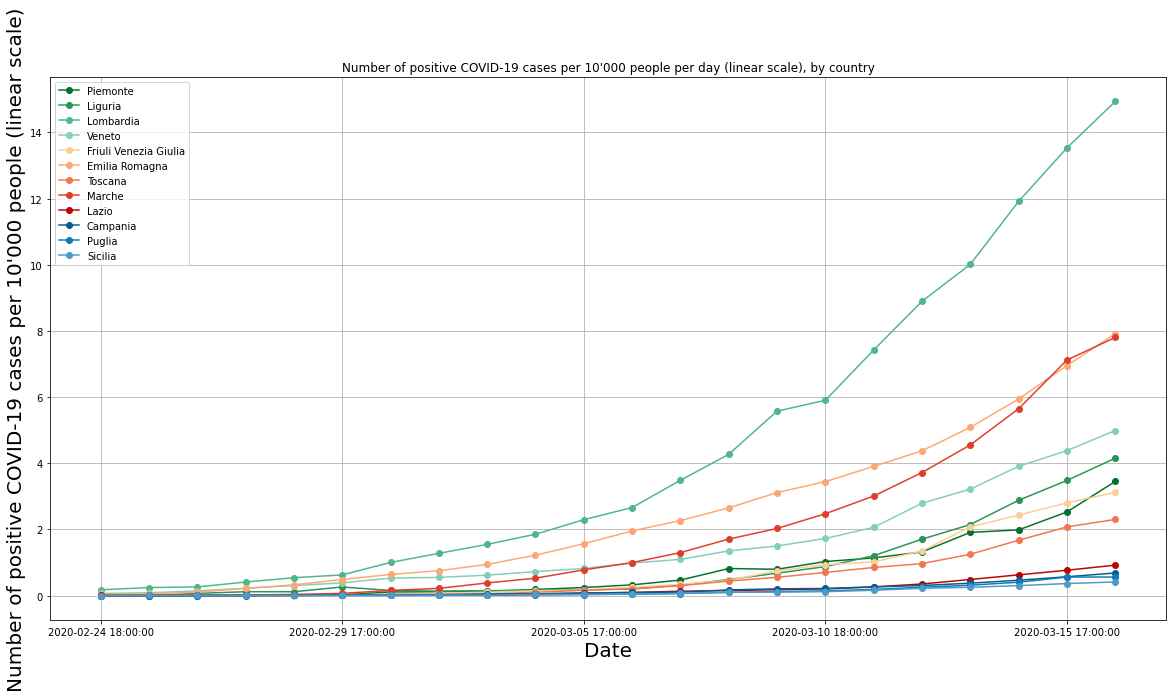

In [18]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (linear scale), by country", figsize = (20,10),)
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (linear scale)", fontsize=20)

Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (log scale)")

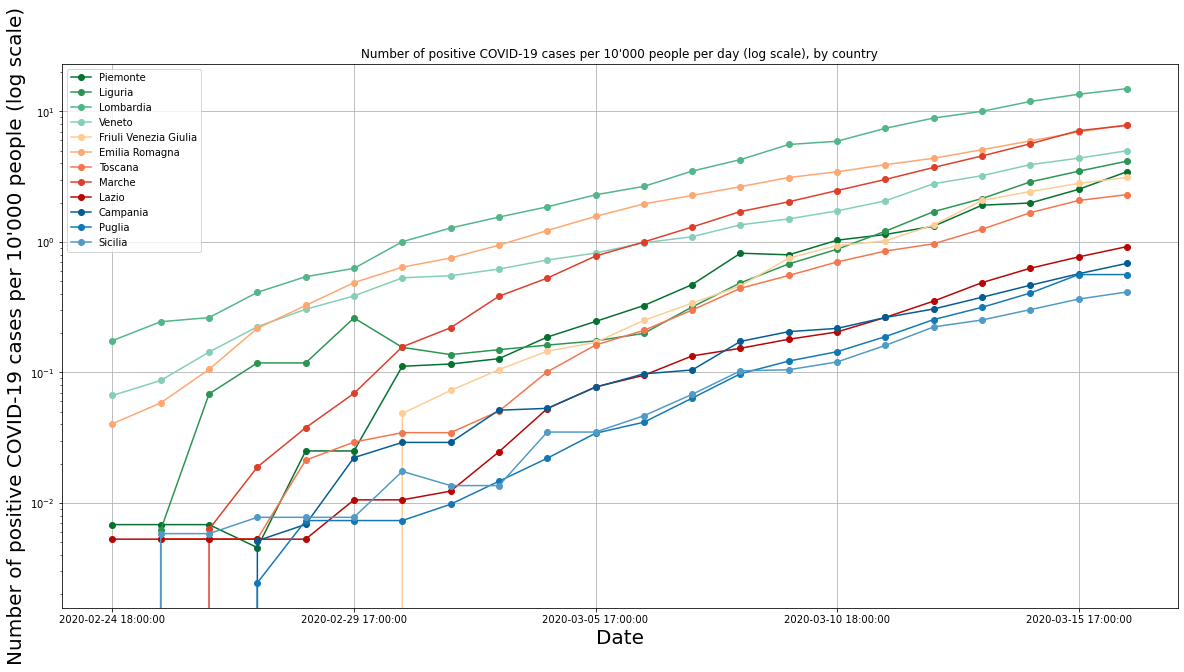

In [19]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (log scale), by country", figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (log scale)", fontsize=20)